In [1]:
import scanpy as sc
import scvi

# Load data

In [2]:
folder_path = "C:/Users/heung/OneDrive/Documents/scData/14. GSE136001_RAW/"
adata = sc.read(folder_path + "annotated.h5ad")
model = scvi.model.SCVI.load(folder_path + "model/", adata)
adata

INFO     File C:/Users/heung/OneDrive/Documents/scData/14. GSE136001_RAW/model/model.pt already downloaded         


AnnData object with n_obs × n_vars = 37255 × 16739
    obs: 'sample', 'sex', 'condition', 'n_genes', 'total_counts', 'pct_counts_mito', 'pct_counts_ribo', '_scvi_batch', '_scvi_labels', 'leiden', '_scvi_raw_norm_scaling', 'cell_type'
    var: 'n_cells'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'cell_type_colors', 'condition_colors', 'dendrogram_cell_type', 'leiden', 'leiden_colors', 'log1p', 'markers', 'neighbors', 'pca', 'rank_genes_groups', 'sample_colors', 'scvi_markers', 'umap'
    obsm: 'X_pca', 'X_scVI', 'X_umap', '_scvi_extra_categorical_covs', '_scvi_extra_continuous_covs'
    varm: 'PCs'
    layers: 'counts', 'scvi_normalized'
    obsp: 'connectivities', 'distances'

In [3]:
model

SCVI model with the following parameters: 
n_hidden: 128, n_latent: 10, n_layers: 1, dropout_rate: 0.1, dispersion: gene, gene_likelihood: zinb, 
latent_distribution: normal.
Training status: Trained
Model's adata is minified?: False

In [5]:
subset = adata[adata.obs['cell_type'].isin(['Activated microglia', 'Microglia'])].copy()

# DE analysis using scVI

In [6]:
scvi_de = model.differential_expression(
    idx1 = [adata.obs['cell_type'] == 'Activated microglia'],
    idx2 = [adata.obs['cell_type'] == 'Microglia']
)

# Any set of cells vs any set of cells

# scvi_de = model.differential_expression(
#     idx1 = [(adata.obs['cell_type'].isin(['Microglia', 'Activated microglia'])) & (adata.obs.condition == 'normal')],
#     idx2 = [(adata.obs['cell_type'].isin(['Microglia', 'Activated microglia'])) & (adata.obs.condition == 'tumor')]
# )

DE...: 100%|██████████| 1/1 [00:08<00:00,  8.95s/it]


In [7]:
# Filter for DE genes with FDR < 0.05 and log fold change > 0.5
scvi_de = scvi_de[(scvi_de['is_de_fdr_0.05']) & (abs(scvi_de.lfc_mean) > .5)]
# fdr: False Discovery Rate, lfc: Log Fold Change
scvi_de = scvi_de.sort_values('lfc_mean')
scvi_de

,proba_de,proba_not_de,bayes_factor,scale1,scale2,pseudocounts,delta,lfc_mean,lfc_median,lfc_std,lfc_min,lfc_max,raw_mean1,raw_mean2,non_zeros_proportion1,non_zeros_proportion2,raw_normalized_mean1,raw_normalized_mean2,is_de_fdr_0.05
S100a9,0.9552,0.0448,3.059712,7.646211e-06,3.308876e-05,0.0,0.25,-2.844204,-2.713235,2.725138,-16.359539,6.730678,0.007800,0.017718,0.007641,0.016658,0.034667,0.091661,True
Cnga2,0.9452,0.0548,2.847706,2.889629e-07,1.220453e-06,0.0,0.25,-2.572521,-2.309123,2.437742,-15.423819,4.682646,0.000159,0.000848,0.000159,0.000848,0.000304,0.003910,True
Gm5483,0.9502,0.0498,2.948657,2.158570e-07,8.352885e-07,0.0,0.25,-2.536929,-2.553690,2.688558,-16.180109,7.182100,0.000159,0.000000,0.000159,0.000000,0.002255,0.000000,True
Khdc1c,0.9522,0.0478,2.991749,4.412533e-08,2.041552e-07,0.0,0.25,-2.390201,-2.334614,2.027196,-14.702965,4.894855,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,True
Rnase10,0.9476,0.0524,2.895026,4.032861e-06,1.512402e-05,0.0,0.25,-2.317338,-2.235770,1.935086,-11.150780,4.315783,0.003343,0.012080,0.003343,0.011445,0.016946,0.059088,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Cxcl13,0.9600,0.0400,3.178054,4.060715e-05,4.204443e-06,0.0,0.25,3.277861,3.316811,3.318907,-10.565039,16.309113,0.046164,0.005765,0.013212,0.001017,0.145660,0.011035,True
Serping1,0.9640,0.0360,3.287572,1.062742e-05,5.617471e-07,0.0,0.25,3.299834,3.218405,2.762670,-7.841823,13.045224,0.017829,0.000339,0.012416,0.000339,0.045622,0.001158,True
Ccl12,0.9750,0.0250,3.663561,2.492422e-03,2.037944e-04,0.0,0.25,3.378560,3.504187,1.933422,-4.488349,9.052468,10.037573,0.610788,0.726361,0.255849,34.628983,2.389189,True
Cd74,0.9650,0.0350,3.316780,7.831064e-03,4.758405e-04,0.0,0.25,3.870353,4.019649,3.331925,-10.667797,12.371408,35.458397,1.521839,0.726998,0.224144,116.670830,4.500460,True


In [7]:
# 양쪽 모두의 sample에서 낮게 발현하는 gene 제거
# OPTIONAL
scvi_de = scvi_de[(scvi_de.raw_normalized_mean1 > .5) | (scvi_de.raw_normalized_mean2 > .5)]
scvi_de


,proba_de,proba_not_de,bayes_factor,scale1,scale2,pseudocounts,delta,lfc_mean,lfc_median,lfc_std,lfc_min,lfc_max,raw_mean1,raw_mean2,non_zeros_proportion1,non_zeros_proportion2,raw_normalized_mean1,raw_normalized_mean2,is_de_fdr_0.05
Gm15056,0.9938,0.0062,5.076985,0.000001,0.000315,0.0,0.25,-7.178988,-7.358657,3.277106,-17.763374,4.510984,0.001017,0.806079,0.000678,0.068746,0.003279,2.058744,True
Ifi205,0.9948,0.0052,5.253881,0.000006,0.000884,0.0,0.25,-7.072874,-7.198896,2.728075,-15.774519,4.224378,0.007503,3.193704,0.004832,0.617723,0.022542,8.493441,True
Ly6c2,0.9974,0.0026,5.949637,0.000036,0.002922,0.0,0.25,-6.760759,-7.016263,2.035354,-12.380494,2.583194,0.072228,13.191503,0.021448,0.790383,0.188276,33.551899,True
Upp1,0.9976,0.0024,6.029880,0.000001,0.000186,0.0,0.25,-6.628748,-6.821994,2.394280,-14.394922,3.892649,0.000721,0.457185,0.000593,0.192331,0.003120,1.099514,True
Gpr171,0.9962,0.0038,5.568944,0.000004,0.000251,0.0,0.25,-6.562366,-6.777684,2.327950,-15.076582,3.875845,0.005044,0.952108,0.003137,0.405921,0.013667,2.288846,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Gp9,0.9988,0.0012,6.724225,0.000100,0.000004,0.0,0.25,5.298234,5.337383,1.333153,-3.667681,9.617301,0.200710,0.004172,0.173110,0.004172,0.969348,0.019296,True
Ecscr,0.9992,0.0008,7.130086,0.000516,0.000018,0.0,0.25,5.315814,5.383159,1.208211,-2.046531,9.752793,1.026344,0.020266,0.588335,0.017087,5.020418,0.058393,True
Gpr34,0.9988,0.0012,6.724225,0.003271,0.000112,0.0,0.25,5.335159,5.379344,1.103890,-2.400433,8.862959,6.399450,0.141864,0.984190,0.087622,31.481695,0.450555,True
P2ry12,0.9994,0.0006,7.417964,0.006556,0.000165,0.0,0.25,5.795840,5.828644,1.124809,-3.925731,9.420672,13.607056,0.316911,0.996821,0.196503,66.538330,0.953460,True


In [8]:
# 맨 위 25개와 맨 아래 25개의 gene name을 추출 (표시할 gene)
genes_to_show = scvi_de[-25:].index.tolist() + scvi_de[:25].index.tolist()
# genes_to_show

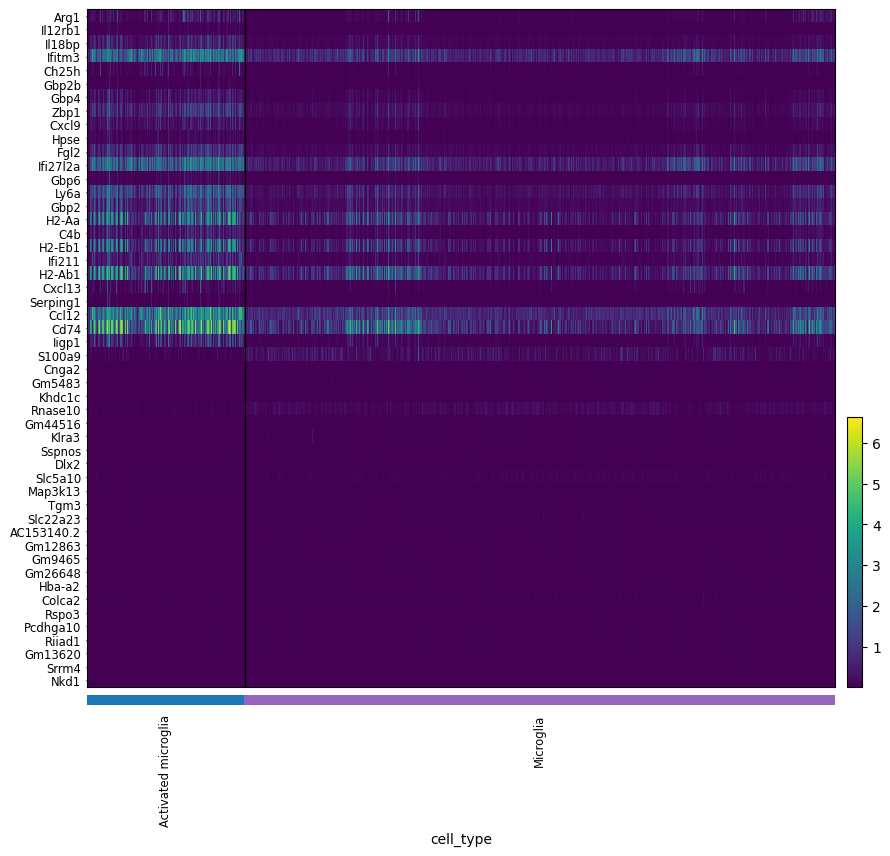

In [9]:
sc.pl.heatmap(
    subset,
    genes_to_show,
    groupby = 'cell_type',
    swap_axes = True,
    layer = 'scvi_normalized',
    log = True
)

# Volcano plot